###Statistical Model
Let the observations of a statistical model be $X_1,\ldots,X_n$ i.i.d. rvs in measurable space

$E$ ($E \subseteq R$) and, denote with $P$ the common distribution.

A **statistical model** associated to the observations is
$(E, \{P_\theta\}_{\theta \in \Theta})$, where:
- $E$ is the sample space.
- $P_\theta$ is a family of probability measures on $E$, indexed by $\theta$.
- $\Theta$ is the parameter set.

____________________________

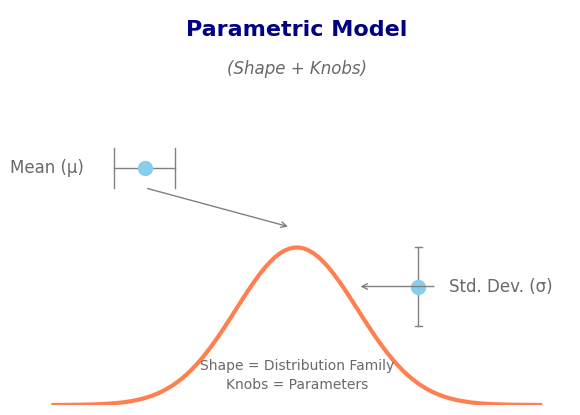

Image 'simplest_parametric_model.png' generated successfully!


In [ ]:
''' generated with Gemini '''

____________________________

### Example of Parametric Models
For $n$ Bernoulli trials ($\{0,1\}$, $\text{Ber}(p)$), $p \in (0,1)$:
$X_1, \dots, X_n \overset{\text{iid}}{\sim} \text{Ber}(p), \quad p \in (0,1).$

$X_1, \dots, X_n \overset{\text{iid}}{\sim} \text{Poiss}(\lambda)$ for some unknown $\lambda > 0$:
$X_1, \dots, X_n \overset{\text{iid}}{\sim} \text{Poiss}(\lambda), \quad \lambda > 0.$

$X_1, \dots, X_n \overset{\text{iid}}{\sim} N(\mu, \sigma^2)$ for some unknown $\mu \in \mathbb{R}$, $\sigma^2 > 0$:
$X_1, \dots, X_n \overset{\text{iid}}{\sim} N(\mu, \sigma^2), \quad (\mu, \sigma^2) \in \mathbb{R} \times (0, \infty).$

$X_1, \dots, X_n \overset{\text{iid}}{\sim} N_d(\mu, I_d)$ for some unknown $\mu \in \mathbb{R}^d$:
$X_1, \dots, X_n \overset{\text{iid}}{\sim} N_d(\mu, I_d), \quad \mu \in \mathbb{R}^d.$



________________________________________________________

### Mixture of Gaussians
Assume we work with each population as a Gaussian with $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$.

The probability density function (PDF) of a mixture of two Gaussians is given by:

$
f(x) = p \cdot \frac{1}{\sigma_1 \sqrt{2\pi}} \exp\left(-\frac{(x-\mu_1)^2}{2\sigma_1^2}\right) + (1-p) \cdot \frac{1}{\sigma_2 \sqrt{2\pi}} \exp\left(-\frac{(x-\mu_2)^2}{2\sigma_2^2}\right)
$

____________________________

### Sampling of a Mixture of Gaussians
1. Sample the latent variable $Z \sim \text{Ber}(\pi)$
2. Sample $X_1 \sim N(\mu_1, \sigma_1^2)$ and $X_2 \sim N(\mu_2, \sigma_2^2)$
3. Define $X = Z \cdot X_1 + (1-Z) \cdot X_2$


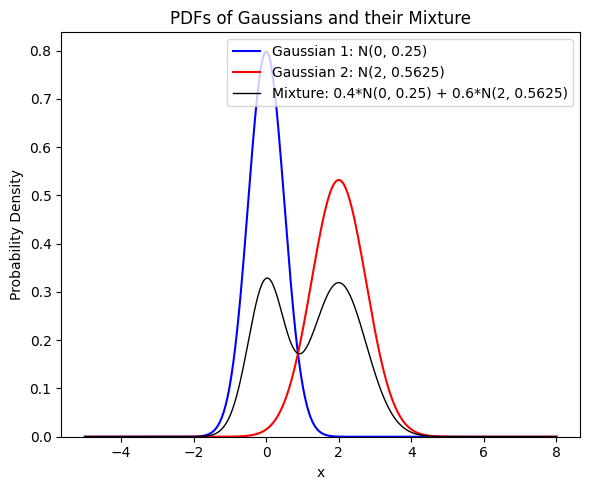

In [ ]:
import numpy as np
from scipy.stats import norm
# the parameters for the Gaussians
mu1, mu2, std1, std2, pi  = 0, 0.5, 2, 0.75, 0.4
x = np.linspace(-3, 6, 500)
# Calculate the PDF for the mixture of Gaussians
pdf_mixture = pi * norm.pdf(x, mu1, std1) + (1 - pi) * norm.pdf(x, mu2, std2)

____________________________

### Mixture of Gaussian model
We consider many scenarios for a model with mixtures of Gaussians

- All five parameters are unknown \\
$( {R}, (\pi {N}(\mu_1, \sigma_1^2)) + (1 -\pi) {N}(\mu_2, \sigma_2^2), \pi \in (0,1), \mu_1, \mu_2 \in {R}, \sigma_1, \sigma_2 \in (0, \infty) )$

- Known variances (say $\sigma_1^2, \sigma_2^2=1$) \\
$( {R}, (\pi {N}(\mu_1, 1)) + (1 -\pi){N}(\mu_2, 1), \pi \in (0,1), \mu_1, \mu_2 \in {R} )$

- Only unknown means say $\sigma_1^2=1, \sigma_2^2=1, \pi =1/2$ \\
$( {R}, (0.5 {N}(\mu_1, 1)) + 0.5 {N}(\mu_2, 1), \pi \in (0,1), \mu_1, \mu_2 \in {R} )$


____________________________

### Identifiability
The parameter $\theta$ is called identifiable if and only if the map
$\theta \mapsto P_\theta$
from $\Theta$ to the space of probability

distributions $P_\theta$ is injective, i.e.,
$\theta \neq \theta' \implies P_\theta \neq P_{\theta'}$ or equivalently $[P_\theta = P_{\theta'} \implies \theta = \theta']$
\
In one of our models, if $X_i = \mathbb{1}_{Y_i \ge 0}$ (indicator function), where $Y_1, \ldots, Y_n \stackrel{iid}{\sim} N(\mu, \sigma^2)$

for some unknown $\mu \in \mathbb{R}$, and $\sigma^2 > 0$, are unobserved: $\mu$ and $\sigma^2$ are not identifiable but $\mu/\sigma$ is.


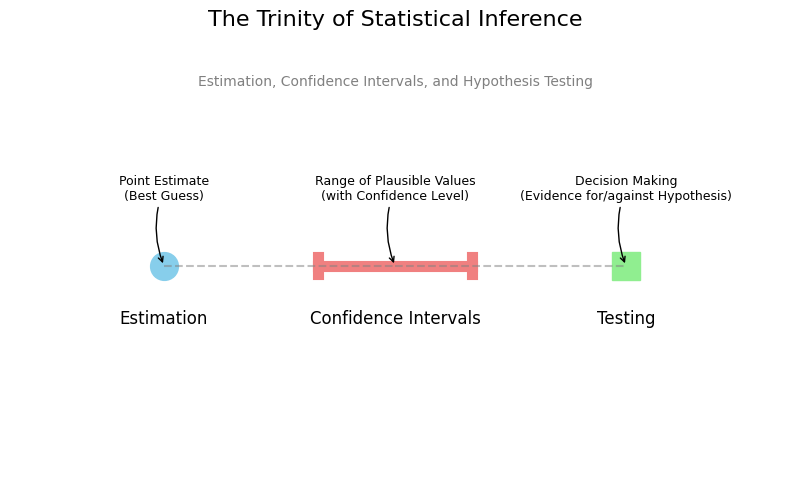

In [ ]:
''' Generated with Gemini '''

### Estimation

### Parameter estimation
- Statistic: Any measurable function of the sample, e.g., $\bar{X}_n$, $\max X_i$, $X_1 + \log(1 +|X_n|)$

- Estimator of $\theta$: Any statistic whose expression does not depend on $\theta$

- An estimator $\hat{\theta}_n$ of $\theta$ is weakly (respectively strongly) if
$\hat{\theta}_n \stackrel{P}{\rightarrow} $\θ $ (w.r.t) $P_\theta\text{)}$, n->inf

- An estimator $\hat{\theta}_n$ of $\theta$ is asymptotically normal if
$\sqrt{n}(\hat{\theta}_n - \theta)$ $\stackrel{d}{\rightarrow}$ N(0, $\sigma^2)$
\
\
The quantity $\sigma^2$ is then called \textbf{asymptotic variance}


____________________________

### Bias of an estimator
- Bias of an estimator $\hat{\theta}_n$ of $\theta$:
\[bias($\hat{\theta}_n$) = E[$\hat{\theta}_n$] - $\theta$
\]

- If $\text{bias}(\hat{\theta}_n) = 0$, we say that $\hat{\theta}_n$ is unbiased.

- Example: Assume that $X_1, \ldots, X_n \overset{iid}{\sim} \text{Ber}(p)$ and consider the following estimations for $p$:
  - $\hat{p}_n = \bar{X}_n$: $\text{bias}(\hat{p}_n) = 0$
  - $\hat{p}_n = X_1$: $\text{bias}(\hat{p}_n) = 0$
  - $\hat{p}_n = \frac{X_1 + X_2}{2}$: $\text{bias}(\hat{p}_n) = 0$
  - $\hat{p}_n = \sqrt{\frac{1}{N}(X_1=1, X_2=1)} \sim \text{Ber}(p^2)$: $\text{bias}(\hat{p}_n) = p^2 - p$


____________________________

### Variance of an estimator
An estimator is a random variable, so we compute its variance:

$\text{var}(X) = E[(X - E(X))^2] = E[X^2] - (E[X])^2$
- $p_n\_hat = \bar{X}_n$: $\text{var}(p_n\_hat) = \frac{p(1-p)}{n}$
- $p_n\_hat = X_1$: $\text{var}(p_n\_hat) = p(1-p)$
- $p_n\_hat = \frac{X_1 + X_2}{2}$: $\text{var}(p_n\_hat) = \frac{p(1-p)}{2}$
- $p_n\_hat = \sqrt{\frac{1}{N}(X_1=1, X_2=1)} \sim \text{Ber}(p^2)$: $\text{var}(p_n\_hat) = p^2(1 - p^2)$


____________________________

### Quadratic risk
- Estimators has to have low bias and low variance at the same time.

- The Quadratic Risk of an estimator $\hat{\theta}_n$ in R is
$R(\hat{\theta}_n)$ = $E[(\hat{\theta}_n - \theta)^2]$
= $\text{var}(\hat{\theta}_n)$ + $\text{bias}^2(\hat{\theta}_n).$


- Low quadratic risk means that both bias and variance are small
$\text{quadratic risk} = \text{bias}^2 + \text{variance}.$


____________________________

### Confidence Interval
Let $(E, (P_\theta)_{\theta \in \Theta})$ be a statistical model based on $X_1, \ldots, X_n$, where $\Theta \subseteq \mathbb{R}$ and $\alpha \in (0, 1)$.

- Confidence Interval (C.I.) of level $1 - \alpha$ for $\theta$:

   Any random interval $I$ whose boundaries do not depend on $\theta$ such that

 $P_\theta[\theta \in I] \geq 1 - \alpha, \quad \text{for all } \theta \in \Theta.$

- C.I. of asymptotic level $1 - \alpha$ for $\theta$:

   Any random interval $I$ whose boundaries do not depend on $\theta$ such that

   $\lim_{n \to \infty} P_\theta[\theta \in I] \geq 1 - \alpha, \quad \text{for all } \theta \in \Theta.$

____________________________

### C.I. Example
- Recall that we observe $R_1, \dots, R_n \overset{iid}{\sim} \text{Ber}(p)$ for some unknown $p \in (0, 1)$.
- Statistical model: $(\{0, 1\}, \{\text{Ber}(p)\}, p \in (0, 1))$.
- Recall that the estimator for $p$ is $\hat{p} = \hat{R}_n$.
- From the CLT:
$\sqrt{n} \frac{(\hat{R}_n - p)}{\sqrt{p(1 - p)}} \overset{d}{\longrightarrow} N(0, 1) \quad \text{for } n \to \infty$

 This precisely means:
  - $\phi(x)$: CDF of $N(0, 1)$, $\phi_n(x)$: CDF of $\sqrt{n} \frac{(\hat{R}_n - p)}{\sqrt{p(1 - p)}}$.
  - Then, $\phi_n(x) \approx \phi(x)$ (CLT) when $n$ becomes large, for all $x > 0$.

   $P[|\hat{R}_n - p| \geq x] \approx 2(1 - \phi(x\sqrt{n}/\sqrt{p(1 - p)}))$


____________________________

### Confidence Interval (Continued)
- For a fixed $\alpha \in (0,1)$, if $q_{\alpha/2}$ is the $(1-\alpha/2) m    $-quantile of $N(0,1)$, then with probability $\approx 1-\alpha$ (if $n$ is large enough!),

 $R_{\hat{n}} \in \left[ p - q_{\alpha/2} \sqrt{\frac{p(1-p)}{n}}, p + q_{\alpha/2} \sqrt{\frac{p(1-p)}{n}} \right].$

- Furthermore,

 $\lim_{n \to \infty} P\left[ R_{\hat{n}} - p \in \left[ - q_{\alpha/2} \sqrt{\frac{p(1-p)}{n}},  q_{\alpha/2} \sqrt{\frac{p(1-p)}{n}} \right] \right] = 1 - \alpha.$

- Note that this is not a confidence interval, and we have three solutions to construct one


**Solution 1 - Conservative bound:**
- Since $p(1-p) \leq \frac{1}{4}$,
- we obtain the asymptotic confidence interval:

  $I_{\text{conservative}} = \left[ R_{\hat{n}} - \frac{q_{\alpha/2}}{2\sqrt{n}}, R_{\hat{n}} + \frac{q_{\alpha/2}}{2\sqrt{n}} \right].$

**Solution 2 - Solving the quadratic equation for $p$:**
- Find the roots $p_1, p_2$ of the quadratic equation:

  $\left(1 + \frac{q_{\alpha/2}^2}{n}\right)p^2 - \left(2R_{\hat{n}} + \frac{q_{\alpha/2}^2}{n}\right)p + R_{\hat{n}}^2 = 0.$
- This leads to a new confidence interval:
  $I_{\text{solve}} = [p_1, p_2].$

**Solution 3 - Plug-in:**
- By the Law of Large Numbers (LLN), $\hat{p} = R_{\hat{n}} \xrightarrow{P} p$ as $n \to \infty$.
- Using Slutsky's theorem, we obtain a new confidence interval:

 $I_{\text{plug-in}} = \left[ R_{\hat{n}} - q_{\alpha/2} \sqrt{\frac{R_{\hat{n}}(1-R_{\hat{n}})}{n}}, R_{\hat{n}} + q_{\alpha/2} \sqrt{\frac{R_{\hat{n}}(1-R_{\hat{n}})}{n}} \right].$

____________________________

### The Delta Method
Let $Z_n$ be a sequence of random variables such that $sqrt(n)(Z_n - \theta) \xrightarrow{d} N(0, \sigma^2)$

for some $\theta \in \mathbb{R}$, and $\sigma^2 > 0$ (asymptotically normal).

Let $g: \mathbb{R} \to \mathbb{R}$ be continuously differentiable at the point $\theta$. Then,
- $g(Z_n)$ is asymptotically normal.
- $\sqrt{n}(g(Z_n) - g(\theta)) \xrightarrow{d} N(0, g'(\theta)^2 \sigma^2)$.


**Consequence of the Delta Method**
- $\sqrt{n}(\lambda_{\text{hat}} - \lambda) \xrightarrow{d} N(0, \lambda^2)$.
- For $\alpha \in (0, 1)$ with $n$ large enough, $|\lambda_{\text{hat}} - \lambda| \leq \frac{q_{\alpha/2} \lambda}{\sqrt{n}}$ with probability approximately $1 - \alpha$,
- The interval $\left[\lambda_{\text{hat}} - \frac{q_{\alpha/2} \lambda}{\sqrt{n}}, \lambda_{\text{hat}} + \frac{q_{\alpha/2} \lambda}{\sqrt{n}}\right]$

 cannot be used as an asymptotic confidence interval for $\lambda$ since it depends on $\lambda$.


**Solutions**
The conservative bound, with no a priori way to bound $\lambda$.

- Solving for $\lambda$:
$[
|\lambda_{\text{hat}} - \lambda| \leq \frac{q_{\alpha/2} \lambda}{\sqrt{n}} \Leftrightarrow \lambda\left(1 - \frac{q_{\alpha/2}}{\sqrt{n}}\right) \leq \lambda_{\text{hat}} \leq \lambda\left(1 + \frac{q_{\alpha/2}}{\sqrt{n}}\right).
]$

 This yields the interval:
$I_{\text{solve}} = \left[\frac{\lambda_{\text{hat}}}{1 + \frac{q_{\alpha/2}}{\sqrt{n}}}, \frac{\lambda_{\text{hat}}}{1 - \frac{q_{\alpha/2}}{\sqrt{n}}}\right]$

 Plug-in:
$I_{\text{plug-in}} = \left[\lambda_{\text{hat}} - \frac{q_{\alpha/2} \lambda_{\text{hat}}}{\sqrt{n}}, \lambda_{\text{hat}} + \frac{q_{\alpha/2} \lambda_{\text{hat}}}{\sqrt{n}}\right] = \left[\lambda_{\text{hat}}\left(1 - \frac{q_{\alpha/2}}{\sqrt{n}}\right), \lambda_{\text{hat}}\left(1 + \frac{q_{\alpha/2}}{\sqrt{n}}\right)\right].$


____________________________

### Statistical Models Recap

- Statistical model is a pair of the form (E, (P_Θ) for θ in Θ ) is a family candidate probability distributions
- Model can be well specified and identifiable
- The trinity of statistical inference: estimation, confidence intervals, testing
- Estimator value whose performance can be measured by consistency,
asymptotic normality, bias, variance and quadratic risk
- Confidence intervals provide 'error bars' around estimators, their size depends on the confidence level
- Hypothesis testing to ask a yes/no answer about an unknown parameters

____________________________

### Total Variation Distance

Let $(E, (P_\theta)_{\theta \in \Theta})$ be a statistical model associated with a sample i.i.d. $X_1, \ldots, X_m$.

Assume that there exists $\theta^* \in \Theta$ such that $X_1 \sim P_{\theta^*}$: $\theta^*$ is the true parameter.

**The goal** is that given $X_1, \ldots, X_n$, find an estimator $\hat{\theta} = \hat{\theta}(X_1, \ldots, X_n)$ such that

$P_{\hat{\theta}}$ is close to $P_{\theta^*}$ for the true parameter $\theta^*$.

This means $|P_{\hat{\theta}}(A) - P_{\theta^*}(A)|$ is small for all $A \in E$.

**Assume that $E$ is discrete**, i.e., finite or countable. This includes Bernoulli, Binomial, Poisson.

Therefore, $X$ has a PMF $P_\theta(X=x) = p_\theta(x)$ for all $x \in E$, where - $p_\theta(x) \geq 0  and \sum_{x \in E} p_\theta(x) = 1$

The total variation distance between $P_\theta$ and $P_{\theta'}$ is a function of the PMFs $p_\theta$ and $p_{\theta'}$:

- $TV(P_\theta, P_{\theta'}) = \frac{1}{2} \sum_{x \in E} |p_\theta(x) - p_{\theta'}(x)|$


**Assume that $E$ is continuous**. This includes Gaussian, Exponential,  

Assume that $X$ has a density $P_\theta(X \in A) = \int_A f_\theta(x) \, dx$, where
- $f_\theta(x) \geq 0$ and $\int_E f_\theta(x) \, dx = 1$.

The total variation distance between $P_\theta$ and $P_{\theta'}$ is a function of the densities $f_\theta$ and $f_{\theta'}$:

- $TV(P_\theta, P_{\theta'}) = \frac{1}{2} \int_E |f_\theta(x) - f_{\theta'}(x)| \, dx.$

For **an estimation strategy**, we build $\widehat{TV}(P_\theta, P_{\theta^*})$ for all $\theta \in \Theta$.

Then, find $\hat{\theta}$ that minimizes the function $\theta \mapsto \widehat{TV}(P_\theta, P_{\theta^*})$.

There are many distances between probability measures to replace the total variation.

The **Kullback-Leibler (KL) divergence** between two probability measures is given by:


____________________________

### Maximum Likelihood Estimation
**Estimating KL Divergence**

The Kullback-Leibler (KL) divergence between $P_{\theta^*}$ and $P_{\theta}$ is given by:

$\text{KL}(P_{\theta^*}, P_{\theta}) = \mathbb{E}_{\theta^*} \left[ \log \left( \frac{p_{\theta^*}(X)}{p_{\theta}(X)} \right) \right] $

$\text{KL}(P_{\theta^*}, P_{\theta}) = \mathbb{E}_{\theta^*} \left[ \log(p_{\theta^*}(X)) \right] - \mathbb{E}_{\theta^*} \left[ \log(p_{\theta}(X)) \right] $

$\text{KL}(P_{\theta^*}, P_{\theta}) = \text{Constant} - \frac{1}{n} \sum_{i=1}^{n} \log(p_{\theta}(X_i)) $

**Maximum Likelihood Principle**

Minimizing the KL divergence is equivalent to maximizing the likelihood:

$\min_{\theta} \text{KL}(P_{\theta^*}, P_{\theta}) $
$\Leftrightarrow \min_{\theta} - \frac{1}{n} \sum_{i=1}^{n} \log(p_{\theta}(X_i))  \\ \Leftrightarrow \max_{\theta} \frac{1}{n} \sum_{i=1}^{n} \log(p_{\theta}(X_i)  \\ \Leftrightarrow \max_{\theta} \sum_{i=1}^{n} \log(p_{\theta}(X_i)) \\
 \Leftrightarrow \max_{\theta} \prod_{i=1}^{n} p_{\theta}(X_i)$


where $X_i$, $i=1,\dots,n$, are the observed data points.

____________________________

### Likelihood Discrete case

Let $(E, (P_\theta), \theta \in \Theta)$ be a statistical model associated with i.i.d. random variables $X_1, \dots, X_n$. Assume $E$ is discrete.

The likelihood of the model is the map $L_n$ or $L$ defined as:

$L_n: E^n \times \Theta \rightarrow \mathbb{R} \\
(x_1, \dots, x_n; \theta) \mapsto P_\theta[X_1 = x_1, \dots, X_n = x_n]$


**The likelihood of the Bernoulli model**

If $X_1, \dots, X_n \sim \text{iid } \text{Ber}(p)$ for some $p \in (0, 1)$:
- $E = \{0, 1\}$
- $\Theta = (0, 1)$
- For each $(x_1, \dots, x_n) \in \{0, 1\}^n$, for each $p \in (0, 1)$:

 $L(x_1, \dots, x_n; p) = \prod_{i=1}^n P_p[X_i = x_i]
= \prod_{i=1}^n p^{x_i} (1 - p)^{(1 - x_i)}
= p^{\sum_{i=1}^n x_i} (1 - p)^{(n - \sum_{i=1}^n x_i)}$

**The likelihood of the Poisson model**

If $X_1, \dots, X_n \sim \text{iid } \text{Poiss}(\lambda)$ for some $\lambda > 0$:
- $E = \mathbb{N}$ (or $\mathbb{N}_0$ depending on definition)
- $\Theta = (0, \infty)$
- For each $(x_1, \dots, x_n) \in \mathbb{N}^n$, for each $\lambda > 0$: \\
$L(x_1, \dots, x_n; \lambda) = e^{-n\lambda} \frac{\lambda^{\sum_{i=1}^n x_i}}{x_1! \cdots x_n!}$



____________________________

### Likelihood, Continuous case

Let $(E, (P_\theta)_{\theta \in \Theta})$ be a statistical model associated with a sample of iid random variables $X_1, \dots, X_n$.

Assume that all $P_\theta$ have density $f_\theta$.

The likelihood of the model is the map $L$ defined as:

$L_n: E^n \times \Theta \rightarrow \mathbb{R}
(x_1, \dots, x_n; \theta) \mapsto \prod_{i=1}^n f_\theta(x_i)$

**The likelihood of the Gaussian model**

If $X_1, \dots, X_n \overset{iid}{\sim} N(\mu, \sigma^2)$ for some $\mu \in \mathbb{R}$, $\sigma^2 > 0$:
- $E = \mathbb{R}$
- $\Theta = \mathbb{R} \times (0, \infty)$
- For each $(x_1, \dots, x_n) \in \mathbb{R}^n$, for each $(\mu, \sigma^2) \in \mathbb{R} \times (0, \infty)$:

$L(x_1, \dots, x_n; \mu, \sigma^2) = \frac{1}{(\sigma \sqrt{2\pi})^n} \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2\right)$

**The likelihood of the Uniform model**

If $X_1, \dots, X_n \overset{iid}{\sim} \text{Unif}(0, \theta)$ for some $\theta > 0$:
- $E = (0, \infty)$
- $\Theta = (0, \infty)$
- For each $(x_1, \dots, x_n) \in (0,\infty)^n$, for each $\theta \in (0,\infty)$ \\
$L(x_1, \dots, x_n; \theta) = \frac{1}{\theta^n} \mathbb{1}_{\{x_{(n)} \leq \theta\}}$ where $x_{(n)} = \max_i(x_i)$.


**The likelihood of the Mixture of two Gaussians model**

If $X_1, \dots, X_n$ are iid random variables from a mixture of two Gaussians,

with means $\mu_1, \mu_2 \in \mathbb{R}$, variances $\sigma_1^2, \sigma_2^2 > 0$ and $\pi \in (0, 1)$:
- $E = \mathbb{R}$
- $\Theta = \mathbb{R} \times \mathbb{R} \times (0, \infty) \times (0, \infty) \times (0,1)$
- For each $(x_1, \dots, x_n) \in \mathbb{R}^n$, for each $(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2, \pi) \in \Theta$:
$L(x_1, \dots, x_n; \mu_1, \mu_2, \sigma_1^2, \sigma_2^2, \pi) = \prod_{i=1}^n \left( \frac{\pi}{\sqrt{2\pi\sigma_1^2}}\exp\left(-\frac{(x_i - \mu_1)^2}{2\sigma_1^2}\right) + \frac{1 - \pi}{\sqrt{2\pi\sigma_2^2}}\exp\left(-\frac{(x_i - \mu_2)^2}{2\sigma_2^2}\right) \right)$


____________________________

### Maximum likelihood estimator

Let $X_1, \dots, X_n$ be an i.i.d. sample associated with model $(E, (P_\theta)_{\theta \in \Theta}) $ and $L$ the likelihood.

**Definition**

The maximum likelihood estimator of $\theta$ is defined as
$\hat{\theta}_{n, \text{MLE}} = \underset{\theta \in \Theta}{\operatorname{argmax}} \, L(X_1, \dots, X_n, \theta) $ provided it exists.

In practice, we use the log-likelihood estimator:
$\hat{\theta}_{n, \text{MLE}} = \underset{\theta \in \Theta}{\operatorname{argmax}} \, \log L(X_1, \dots, X_n, \theta)  $

- Bernoulli trials: $\hat{p}_{n, \text{MLE}} = \hat{X}_n$
- Poisson model: $\hat{\lambda}_{n, \text{MLE}} = \hat{X}_n$
- Gaussian model: $(\hat{\mu}_n, \hat{\sigma}_n^2)_{\text{MLE}} = (\hat{X}_n, S_n)$
- Uniform model: $\hat{\theta}_{\text{MLE}} = X_{(n)} = \max_i(X_i)$
- Mixture of Gaussians: no closed form, and we use an optimization algorithm like EM.

**Where**:
- $\hat{X}_n = \frac{1}{n}\sum_{i=1}^{n} X_i$ (sample mean)
- $S_n = \frac{1}{n} \sum_{i=1}^{n}(X_i - \hat{X}_n)^2$ (sample variance)
- $X_{(n)} = \max_i(X_i)$ (sample maximum)

____________________________

**Expectation-Maximization (EM) algorithm**

To illustrate EM, assume that $\pi = \frac{1}{2}$, $\sigma_1^2 = \sigma_2^2 = 1$

The probability density function (PDF) is given by: \\
  $f(x) = \frac{1}{2\sqrt{2\pi}} \left\{ e^{-\frac{(x - \mu_1)^2}{2}} + e^{-\frac{(x - \mu_2)^2}{2}} \right\}$

The log-likelihood is: \\
$l(x_1, \dots, x_m; \mu_1, \mu_2) = \sum_{i=1}^{m} \log \left[ e^{-\frac{(x_i - \mu_1)^2}{2}} + e^{-\frac{(x_i - \mu_2)^2}{2}} \right] - n \log(2\sqrt{2\pi})$

where $n$ is the number of data points.

____________________________

**Complete Observations**

We have the sampling
$X = ZX^{(1)} + (1-Z)X^{(2)}$ \\
where $Z$ is a latent variable with probability mass function (pmf)
$ p(z) = \begin{cases}
\frac{1}{2} & \text{if } z=0 \\
\frac{1}{2} & \text{if } z=1
\end{cases} $

What if we observed both $(Z, X)$?

Their joint density is
$f(x, z) = p(z) f(x|z) \\
= \frac{1}{2} \left( z \frac{1}{\sqrt{2\pi}} e^{-\frac{(x - \mu_1)^2}{2}} + (1-z) \frac{1}{\sqrt{2\pi}} e^{-\frac{(x - \mu_2)^2}{2}} \right) \\
= \frac{1}{2\sqrt{2\pi}} \exp\left( -\frac{z(x - \mu_1)^2}{2} - \frac{(1-z)(x - \mu_2)^2}{2} \right)$

____________________________

**Complete likelihood**

The complete likelihood becomes \\
$L^{\text{comp}}((x_1,z_1),\dots,(x_n,z_n);\mu_1,\mu_2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{z_i(x_i - \mu_1)^2}{2} - \frac{(1-z_i)(x_i - \mu_2)^2}{2}\right)$


and the corresponding complete log-likelihood is
$l^{\text{comp}}(\mu_1,\mu_2) = -n\log(\sqrt{2\pi}) - \frac{1}{2} \sum_{i=1}^{n} \left[ Z_i(X_i - \mu_1)^2 + (1 - Z_i)(X_i - \mu_2)^2 \right]$

____________________________

**The EM Algorithm**

Input data: $X_1, \dots, X_n$

1. Initialize $\hat{\mu}_1$, $\hat{\mu}_2$ (from $N(0,1)$).
2. Repeat until convergence:

   Compute weights (E-step):
  $w_i \leftarrow \frac{e^{-\frac{(X_i - \hat{\mu}_1)^2}{2}}}{e^{-\frac{(X_i - \hat{\mu}_1)^2}{2}} + e^{-\frac{(X_i - \hat{\mu}_2)^2}{2}}}$
        
   Update centers (M-step):
$\hat{\mu}_1 \leftarrow \frac{\sum_{i=1}^{n} w_i X_i}{\sum_{i=1}^{n} w_i}$
$\hat{\mu}_2 \leftarrow \frac{\sum_{i=1}^{n} (1 - w_i) X_i}{\sum_{i=1}^{n} (1 - w_i)}$


____________________________

### Fisher Information

Define the log-likelihood for one observation as
$l(\theta) = \log L_1(X, \theta), \quad \theta \in \Theta \subseteq \mathbb{R}$

Assume $l$ is twice differentiable. Under certain conditions,

Fisher Information of the statistical model is defined as
$I(\theta) = \text{Var}[l'(\theta)] = -E[l''(\theta)]$

**Equivalence of the two definitions**

We write it in case of a continuous random variable with pdf $f_\theta$:
$\int f_\theta(x) \, dx = 1 $

Therefore,
$\frac{d}{d\theta} \left( \int f_\theta(x) \, dx \right) = \int \frac{d}{d\theta} f_\theta(x) \, dx = 0 $

**We now compute derivatives**:

$l'(\theta) = \frac{d}{d\theta} \log(f_\theta(x)) = \frac{\frac{d}{d\theta} f_\theta(x)}{f_\theta(x)} &

$l''(\theta) = \frac{\frac{d^2}{d\theta^2} f_\theta(x)}{f_\theta(x)} - \frac{\left( \frac{d}{d\theta} f_\theta(x) \right)^2}{f_\theta(x)^2}$

$\text{Var}[l'(\theta)] = E[(l'(\theta))^2] - (E[l'(\theta)])^2 = \int \frac{\left( \frac{d}{d\theta} f_\theta(x) \right)^2}{f_\theta(x)} \, dx $

$E[l''(\theta)] = \int \left( \frac{\frac{d^2}{d\theta^2} f_\theta(x)}{f_\theta(x)} - \frac{\left( \frac{d}{d\theta} f_\theta(x) \right)^2}{f_\theta(x)^2} \right) f_\theta(x) \, dx $

Since $\int \frac{d}{d\theta} f_\theta(x) \, dx = 0$, we have $\int l'(\theta) f_\theta(x) dx = 0$ implying $E[l'(\theta)]=0$.

**Integration by parts on the first term yields:**

$\int \frac{d^2 f_\theta(x)}{d\theta^2} \, dx = \left[ \frac{d f_\theta(x)}{d\theta} \right]_{-\infty}^{\infty} - \int \frac{d f_\theta(x)}{d\theta} \frac{d f_\theta(x)}{f_\theta(x) d\theta} \, dx = - \int \frac{\left( \frac{d}{d\theta} f_\theta(x) \right)^2}{f_\theta(x)} \, dx $

Thus,
$E[l''(\theta)] = - \int \frac{\left( \frac{d}{d\theta} f_\theta(x) \right)^2}{f_\theta(x)} \, dx = - \text{Var}[l'(\theta)] $


____________________________

Fisher Information of the Bernoulli Experiment

Let $X \sim \text{Ber}(p)$. The likelihood function is given by:
$L(p) = p^X (1-p)^{1-X}$

The log-likelihood is:
$l(p) = \log[p^X (1-p)^{1-X}] = X\log(p) + (1-X)\log(1-p)$

The first derivative of the log-likelihood function with respect to $p$ is:
- $l'(p) = \frac{X}{p} - \frac{1-X}{1-p}$$

The variance of $l'(p)$ is:
- $\text{Var}[l'(p)] = \frac{1}{p(1-p)}$$

The second derivative of the log-likelihood function with respect to $p$ is:
- $l''(p) = -\frac{X}{p^2} - \frac{1-X}{(1-p)^2}$

The negative expected value of the second derivative is:
- $-E[l''(p)] = -E\left[-\frac{X}{p^2} - \frac{1-X}{(1-p)^2}\right] = \frac{E[X]}{p^2} + \frac{1-E[X]}{(1-p)^2}$

Since $E[X] = p$, we have:
- $-E[l''(p)] = \frac{p}{p^2} + \frac{1-p}{(1-p)^2} = \frac{1}{p} + \frac{1}{1-p} = \frac{1-p+p}{p(1-p)} = \frac{1}{p(1-p)}$

Therefore, the Fisher information is:
- $I(p) = \text{Var}[l'(p)] = -E[l''(p)] = \frac{1}{p(1-p)}$

____________________________

### MLE Strategy

Observe $X_1, \dots, X_n \sim P_{\theta^*}$, iid, $\theta^*$ unknown.

- Ideal loss function $L(\theta) \rightarrow \text{KL}(P_{\theta^*}, P_\theta)$ minimized at $\theta = \theta^*$.
- Observe that $\text{KL}(P_{\theta^*}, P_\theta) = -E_{\theta^*}[\log(p_\theta(X))]$ (plus an additive constant).
- Estimate by $-\frac{1}{n}\sum_{i=1}^n \log(p_\theta(X_i))$ (log-likelihood).
- $\hat{\theta} = \underset{\theta}{\text{argmin}} \left\{ -\frac{1}{n} \sum_{i=1}^n \log(p_\theta(X_i)) \right\}$.

____________________________

### M-estimators
Idea
- Let $X_1, \dots, X_n$ be i.i.d. with some unknown distribution $P$ in some

  sample space $E$ ($E \subseteq {R}^d$ for some $d \geq 1$).
- No statistical model needs to be assumed.
- Goal is to estimate some parameter $\mu^*$ associated with $P$, its mean, variance, median,

  other quantiles, the true parameter in some statistical model.
- Find a function $\rho: E \times M \rightarrow {R}$, where $M$ is the set of all possible values for the unknown $\mu^*$,

  such that
 Q(\mu) = {E}[\rho(X_1, \mu)] achieves its minimum at $\mu = \mu^*$.

____________________________

### MLE as an M-estimator

Assume that $(E, \{P_\theta\}_{\theta \in \Theta})$ is a statistical model associated with the data.

Let $M = \Theta$ and $p(x, \theta) = -\log L_1(x, \theta)$, provided the likelihood $L_1(x, \theta) > 0$.

Then $\mu^* = \theta^*$, where $P = P_{\theta^*}$ (i.e., $\theta^*$ is the true value of the parameter).

Examples
- Empirical mean - Empirical median - Empirical quantiles - Maximum Likelihood Estimator (MLE)

____________________________

Method of Moments

Let $X$ be a random variable with distribution $P_\theta$. For $k=1,2,\dots$,

the moment of order $k$ of $X$ is given by $m_k = m_k(\theta) = E_\theta[X^k].$

**Gaussian Distribution**

Let $X \sim N(\mu, \sigma^2)$. Then,
$
m_1 = E[X] = \mu \\
m_2 = E[X^2]
    = \text{Var}[X] + (E[X])^2 \\
    = \sigma^2 + \mu^2.
$

**Bernoulli Distribution**

Let $X \sim \text{Ber}(p)$. Then,
$
m_1 = E[X] = p \\
m_k = E[X^k] = p.$


Moment Generating Function **(MGF) of a Standard Gaussian**

Let $Z \sim N(0,1)$.  

Then, the MGF of $Z$ is given by
$M_Z(t) = E[e^{tZ}] = \\ \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} e^{tz} e^{-z^2/2} dz \\
       = e^{t^2/2} \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} e^{-(z-t)^2/2} dz \\
       = e^{t^2/2} \cdot 1 \\
M_Z(t) = e^{t^2/2}. $

**Moments of Gaussians**

For any random variable $X$, $m_k = M_X^{(k)}(0)$, where $M_X^{(k)}(0)$

denotes the $k$-th derivative of the MGF of $X$ evaluated at $t=0$.

Let $X = Z \sim N(0,1)$. To compute $M_Z^{(k)}(0)$, we need to find
$M_Z^{(k)}(0) = \left.\frac{d^k}{dt^k} e^{t^2/2}\right|_{t=0}.$


____________________________

### Method of Moments Estimator

The method of moments estimator $\hat{\theta}_n$ in $\mathbb{R}^d$ satisfies
$
m_1(\hat{\theta}_n) = \hat{m}_1 \\
m_2(\hat{\theta}_n) = \hat{m}_2 \\
\vdots \\
m_d(\hat{\theta}_n) = \hat{m}_d
$

This is a system of $d$ equations with $d$ unknowns.

**Normal Distribution**

Let $X \sim N(\mu, \sigma^2)$ ($d = 2$). Then,
$
m_1 = \mu \\
m_2 = \sigma^2 + \mu^2
$

The method of moments estimators $(\hat{\mu}_n, \hat{\sigma}_n^2)$ are given by

$(\hat{\mu}_n, \hat{\sigma}_n^2) = (\bar{X}_n, \overline{X^2}_n - (\bar{X}_n)^2)$
where $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ and $\overline{X^2}_n = \frac{1}{n} \sum_{i=1}^n X_i^2$.

**Bernoulli Distribution**

Let $X \sim \text{Ber}(p)$ ($d = 1$). Then,
$m_1 = p$

The method of moments estimator $\hat{p}_n$ is given by
$\hat{p}_n = \bar{X}_n$


____________________________

Recap
- Three principled methods for estimation: Maximum Likelihood Estimation (MLE),

  M-estimation, and Method of Moments.
- Maximum likelihood is an example of M-estimation.
- MLE tends to be the best, as its asymptotic variance is smaller, given by the inverse Fisher information.